In [ ]:
%%capture
!pip install easyocr
!pip install git+https://github.com/JaidedAI/EasyOCR.git
!pip install ultralytics

In [1]:
import cv2
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import os
from ultralytics import YOLO
from IPython.display import Image
from PIL import Image
import easyocr
from difflib import SequenceMatcher

import ultralytics
# проверка на успешную установку и импорт библиотеки ultralytics
ultralytics.checks()

Ultralytics 8.3.28  Python-3.9.13 torch-2.5.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
Setup complete  (16 CPUs, 15.6 GB RAM, 409.0/476.3 GB disk)


In [2]:
def crop_by_bboxes(image_path, bboxes):
    """
    Обрезка и сохранение изображений по bounding boxes.

    :param image_path: str - Путь к изображению
    :param bboxes: list - Список bounding boxes в формате (центр x, центр y, ширина, высота)
    """
    # Загрузить изображение
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Не удалось загрузить изображение.")

    # Пройтись по каждому bounding box
    result = []
    for i, (cx, cy, w, h) in enumerate(bboxes):
        # Преобразование координат из (центр x, центр y, ширина, высота) в (x1, y1, x2, y2)
        x1 = int(cx - w / 2)
        y1 = int(cy - h / 2)
        x2 = int(cx + w / 2)
        y2 = int(cy + h / 2)

        # Проверка выхода за пределы изображения
        x1 = max(0, x1)
        y1 = max(0, y1)
        x2 = min(image.shape[1], x2)
        y2 = min(image.shape[0], y2)

        # Обрезать изображение по координатам
        cropped_image = image[y1:y2, x1:x2]

        # Преобразовать обрезанное изображение в формат PIL и сохранить как новый файл
        cropped_pil_image = Image.fromarray(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
        result.append(cropped_pil_image)
        cropped_pil_image.save(f"cropped_bbox_{i}.jpg")
    return result

In [3]:
data_check = []
with open('C:\\Users\\golov\\Downloads\\s.txt',encoding='utf-8') as f:
    for i in f.readlines():
        print(i,end=" ")
        data_check.append(i.strip())
def find_most_similar_string(target, strings_list):
    most_similar = None
    highest_similarity = 0.0

    for string in strings_list:
        similarity = SequenceMatcher(None, target, string).ratio()

        if similarity > highest_similarity:
            highest_similarity = similarity
            most_similar = string

    return most_similar

"1391-30-0108 ТС1.1"
 "1391-30-0114 ТС1.1"
 "1391-30-0115 ТС1.1"
 "1391-30-1145 ТС1.1"
 "1391-30-1146 ТС1.1"
 "1391-30-1151 ТС1.1"
 "195-30-1061 ТС1.1"
 "195-30-1061 ТС1.1 Пр."
 "195-30-1153 ТС1.1"
 "195-30-1164 ТС1.1"
 "195-30-1221 ТС1.1"
 "195-30-1222 ТС1.1"
 "195-30-1283 ТС1.1"
 "195-30-1285 ТС1.1"
 "195-30-1286 ТС1.1"
 "195-30-1317 ТС1.1"
 "АМ117.06.00.002"
 "АМ117.06.00.003"
 "АМ117.06.00.004"
 "АМ117.06.00.005"
 "АМ117.06.00.006"
 "АМ117.06.00.007"
 "АМ117.06.00.007-01"
 "АМ117.06.01.004"
 "АМ117.06.01.200"
 "АМ117.06.01.300"
 "АМ117.06.01.301"
 "АМ117.06.01.302"
 "АМ117.06.01.303"
 "АМ117.06.01.304"
 "АМ117.06.01.305"
 "АМ117.06.08.001"
 "АМ118.06.00.000"
 "АМ118.06.00.700"
 "АМ118.06.00.710"
 "АМ118.06.00.720"
 "АМ118.06.01.000"
 "АМ118.06.01.100"
 "АМ118.06.02.000"
 "АМ118.06.03.000"
 "АМ118.06.03.001"
 "АМ118.06.06.000"
 "АМ118.06.07.000"
 "АМ118.06.08.000"
 "АМ118.06.09.000"
 "АМ118.06.09.100"
 "Г 13716.105"
 "ПМ118.06.00.910-11"
 "0863-8051/002"
 "1391-30-0108 ТС1.2"
 "1391

In [4]:
# Укажите путь к папке с изображениями и путь для сохранения обработанных изображений
input_folder = "C:\\Users\\golov\\Downloads\\images"
output_folder = "C:\\Users\\golov\\Downloads\\images"

# Создайте папку для сохранения обработанных изображений, если она не существует
os.makedirs(output_folder, exist_ok=True)

# Проходим по каждому файлу в папке
for filename in os.listdir(input_folder):
    # Проверяем, является ли файл изображением
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        # Открываем изображение
        with Image.open(os.path.join(input_folder, filename)) as img:
            # Сжимаем изображение до 640x640
            img_resized = img.resize((640, 640))
            # Применяем черно-белый фильтр
            img_bw = img_resized.convert('L')
            # Сохраняем изображение в папку для обработанных изображений
            output_path = os.path.join(output_folder, filename)
            img_bw.save(output_path)

print("Обработка изображений завершена.")

Обработка изображений завершена.



0: 640x640 1 train- ..-train-images, 10.0ms
Speed: 8.0ms preprocess, 10.0ms inference, 118.0ms postprocess per image at shape (1, 3, 640, 640)
Detection time for 105_JPG.rf.a811db5ab73f9c0c04f93fdfd052b546.jpg: 0.66 seconds


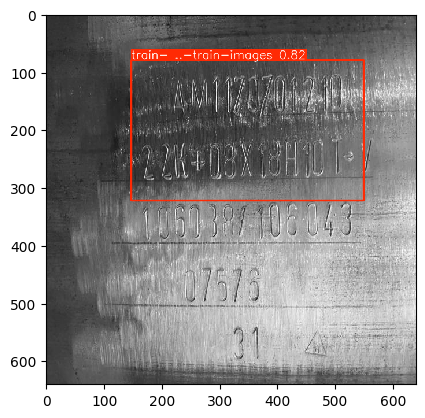

Number of cropped images: 1
OCR time for cropped_bbox_0.jpg: 0.14 seconds
Самая похожая строка: АНЕМ.301159.224
ШМ324

0: 640x640 1 train- ..-train-images, 7.0ms
Speed: 4.0ms preprocess, 7.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Detection time for 109_JPG.rf.6948783fc4ef735b61bd4b060c60c382.jpg: 0.02 seconds


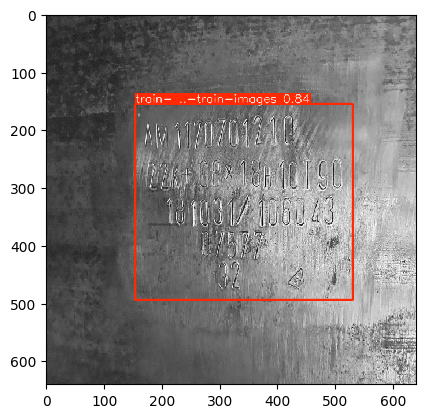

Number of cropped images: 1
OCR time for cropped_bbox_0.jpg: 0.18 seconds
Самая похожая строка: АНЕМ.301421.067
NiIO 01210

0: 640x640 1 train- ..-train-images, 12.0ms
Speed: 7.0ms preprocess, 12.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Detection time for 119_JPG.rf.bd2b9c3471f8319cf197435f68d0949b.jpg: 0.03 seconds


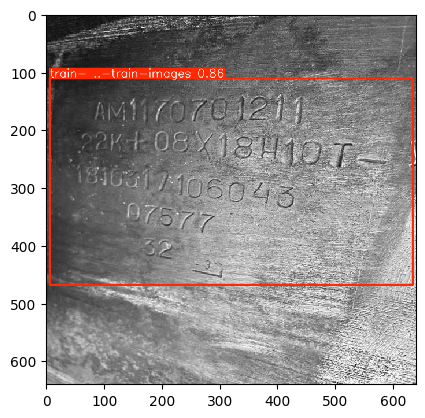

Number of cropped images: 1
OCR time for cropped_bbox_0.jpg: 0.12 seconds
Самая похожая строка: АМ117.07.01.211
KMИ7070 1211

0: 640x640 1 train- ..-train-images, 9.0ms
Speed: 4.0ms preprocess, 9.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Detection time for 121_JPG.rf.d670dbf728db87b691ceffd4c1ed34a6.jpg: 0.02 seconds


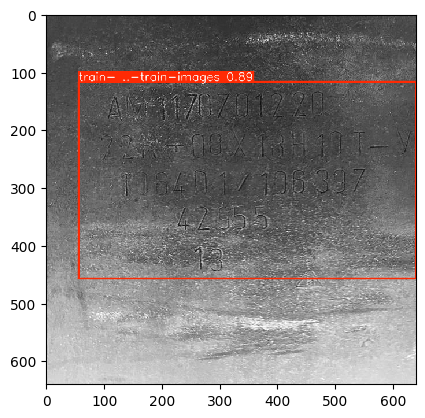

Number of cropped images: 1
OCR time for cropped_bbox_0.jpg: 0.08 seconds
Самая похожая строка: АМ117.06.01.303
1/196 337

0: 640x640 1 train- ..-train-images, 8.0ms
Speed: 2.0ms preprocess, 8.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Detection time for 124_jpg.rf.5d5a26ee0997202cddff2010667c1ba4.jpg: 0.02 seconds


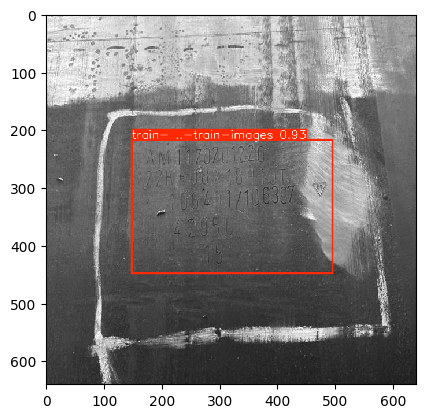

Number of cropped images: 1
OCR time for cropped_bbox_0.jpg: 0.08 seconds
Самая похожая строка: 7109-4361
4M

0: 640x640 1 train- ..-train-images, 8.0ms
Speed: 2.0ms preprocess, 8.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Detection time for 125_JPG.rf.5633bfe3370ac025b2035e9e0d4b8fcd.jpg: 0.02 seconds


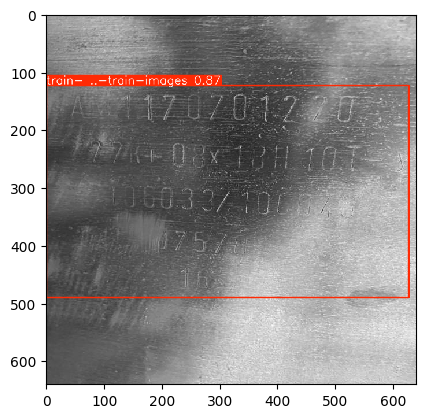

Number of cropped images: 1
OCR time for cropped_bbox_0.jpg: 0.10 seconds
Самая похожая строка: АМ116.17.05.812 Пр. 
11717U1 2 7 U

0: 640x640 1 train- ..-train-images, 6.9ms
Speed: 1.0ms preprocess, 6.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Detection time for 136_JPG.rf.c35f20c75b30c76199597f97f6249c11.jpg: 0.02 seconds


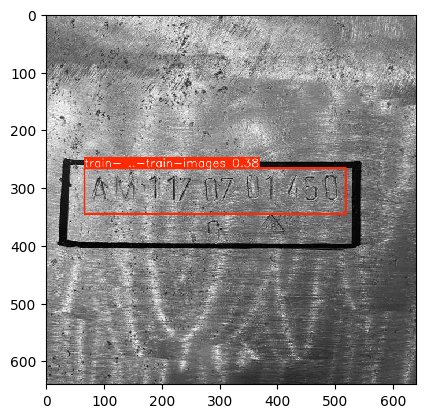

Number of cropped images: 1
OCR time for cropped_bbox_0.jpg: 0.06 seconds
Самая похожая строка: АМ117.07.01.450
AV 117 07 61 450

0: 640x640 1 train- ..-train-images, 8.0ms
Speed: 2.0ms preprocess, 8.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Detection time for 162_JPG.rf.bc0d217cc252c7c4dba6ecc1dc67a137.jpg: 0.02 seconds


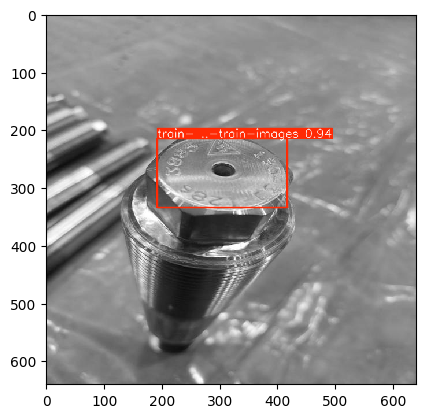

Number of cropped images: 1
OCR time for cropped_bbox_0.jpg: 0.04 seconds
Самая похожая строка: 1250323
3

0: 640x640 1 train- ..-train-images, 8.0ms
Speed: 2.0ms preprocess, 8.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Detection time for 169_JPG.rf.0b59b1b668c5c2b04758fe8a5d93c882.jpg: 0.02 seconds


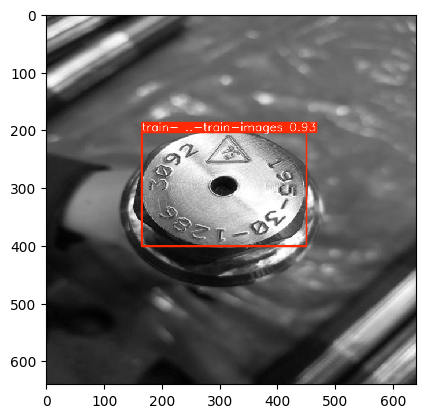

Number of cropped images: 1
OCR time for cropped_bbox_0.jpg: 0.05 seconds
Самая похожая строка: 1250323
Ejl

0: 640x640 1 train- ..-train-images, 9.0ms
Speed: 4.0ms preprocess, 9.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Detection time for 176_JPG.rf.d7b03fdb550425a7395e34644ed861c0.jpg: 0.02 seconds


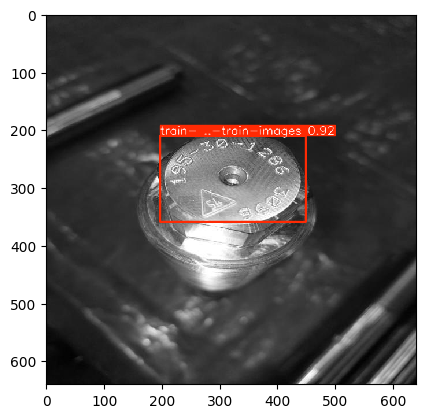

Number of cropped images: 1
OCR time for cropped_bbox_0.jpg: 0.06 seconds
Самая похожая строка: 1250323
@э

0: 640x640 1 train- ..-train-images, 7.0ms
Speed: 2.0ms preprocess, 7.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Detection time for 184_JPG.rf.047025247f2b01adf69b924ec93249db.jpg: 0.02 seconds


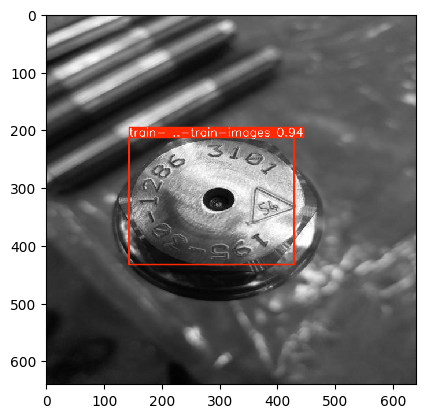

Number of cropped images: 1
OCR time for cropped_bbox_0.jpg: 0.13 seconds
Самая похожая строка: 1250323
S1

0: 640x640 1 train- ..-train-images, 8.0ms
Speed: 4.0ms preprocess, 8.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Detection time for 188_JPG.rf.e14bd9799d5484e827afa41f69e63c78.jpg: 0.02 seconds


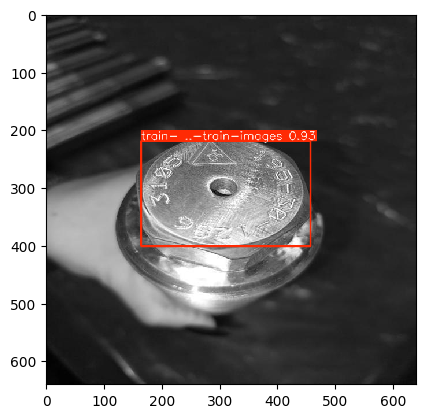

Number of cropped images: 1
OCR time for cropped_bbox_0.jpg: 0.06 seconds
Самая похожая строка: 1250323
Ф

0: 640x640 1 train- ..-train-images, 8.0ms
Speed: 2.0ms preprocess, 8.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Detection time for 191_JPG.rf.dce3b2ae72e236b7510bcb6f08cb1474.jpg: 0.02 seconds


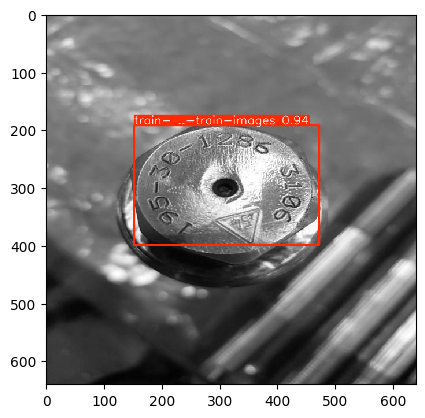

Number of cropped images: 1
OCR time for cropped_bbox_0.jpg: 0.07 seconds
Самая похожая строка: АМ117.07.01.221 Пр. макс
нет текста

0: 640x640 2 train- ..-train-imagess, 8.0ms
Speed: 2.0ms preprocess, 8.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Detection time for 1_JPG.rf.8d94205bd4210d315ad1bb7a4de6a274.jpg: 0.02 seconds


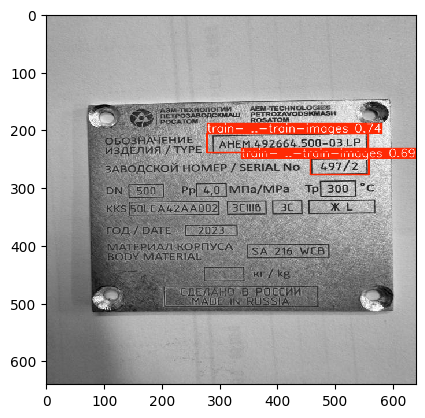

Number of cropped images: 2
OCR time for cropped_bbox_0.jpg: 0.05 seconds
Самая похожая строка: АНЕМ.492664.500-03.LP
АНЕМ 492664.500-03 LP
OCR time for cropped_bbox_1.jpg: 0.04 seconds
Самая похожая строка: 497/2
497/2

0: 640x640 1 train- ..-train-images, 18.0ms
Speed: 7.0ms preprocess, 18.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Detection time for 204_JPG.rf.e2ffc534120a75630c14085015527706.jpg: 0.04 seconds


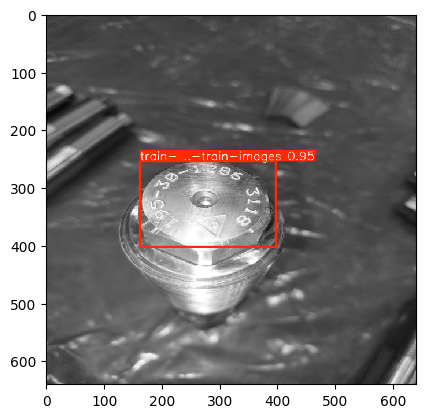

Number of cropped images: 1
OCR time for cropped_bbox_0.jpg: 0.05 seconds
Самая похожая строка: 1250323
@0

0: 640x640 1 train- ..-train-images, 8.0ms
Speed: 2.0ms preprocess, 8.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Detection time for 212_JPG.rf.d1eaa0617ec16ff34e19212a42bd6ce1.jpg: 0.02 seconds


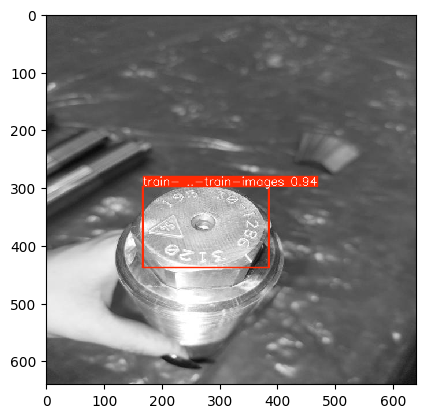

Number of cropped images: 1
OCR time for cropped_bbox_0.jpg: 0.10 seconds
Самая похожая строка: 1250323
A

0: 640x640 1 train- ..-train-images, 8.0ms
Speed: 3.0ms preprocess, 8.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Detection time for 217_JPG.rf.3158402c07f091136c7cf699a2cb10eb.jpg: 0.02 seconds


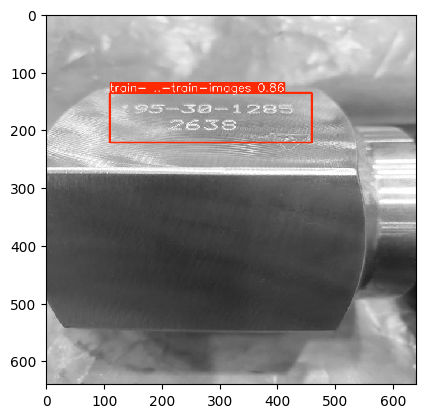

Number of cropped images: 1
OCR time for cropped_bbox_0.jpg: 0.07 seconds
Самая похожая строка: 1753-30-1325
5этза-1zе5

0: 640x640 1 train- ..-train-images, 7.0ms
Speed: 2.0ms preprocess, 7.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Detection time for 229_JPG.rf.29d2ea943d9bcdd199918ff4a2a33265.jpg: 0.02 seconds


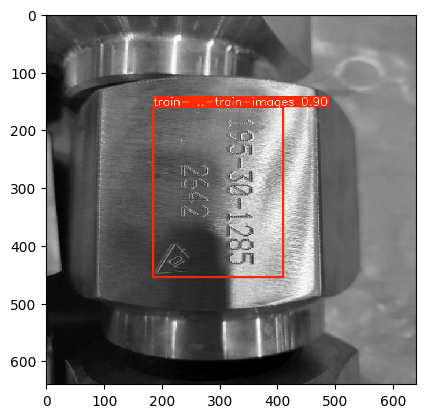

Number of cropped images: 1
OCR time for cropped_bbox_0.jpg: 0.06 seconds
Самая похожая строка: 1250323
55

0: 640x640 1 train- ..-train-images, 7.0ms
Speed: 3.0ms preprocess, 7.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Detection time for 24_JPG.rf.4bf4e3708af803d9ffc89a8c5497b70b.jpg: 0.02 seconds


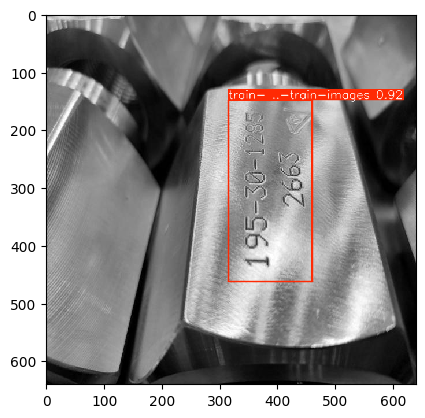

Number of cropped images: 1
OCR time for cropped_bbox_0.jpg: 0.05 seconds
Самая похожая строка: 1250323
[

0: 640x640 1 train- ..-train-images, 7.0ms
Speed: 3.0ms preprocess, 7.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Detection time for 265_JPG.rf.38d08671e2ff91daaf66cf3af92c2fa4.jpg: 0.01 seconds


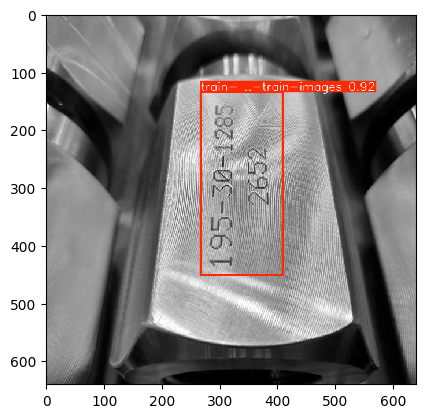

Number of cropped images: 1
OCR time for cropped_bbox_0.jpg: 0.06 seconds
Самая похожая строка: 1250323
5

0: 640x640 1 train- ..-train-images, 13.0ms
Speed: 6.0ms preprocess, 13.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Detection time for 270_JPG.rf.ed070c059af77b760fa0d35d17edb24f.jpg: 0.04 seconds


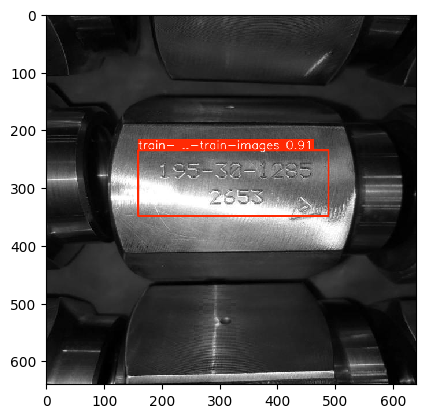

Number of cropped images: 1
OCR time for cropped_bbox_0.jpg: 0.05 seconds
Самая похожая строка: 1753-30-1325
s5--e-1z55

0: 640x640 1 train- ..-train-images, 7.0ms
Speed: 2.0ms preprocess, 7.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Detection time for 287_JPG.rf.5a36bbdf5e17eef2308a0492a8a475dc.jpg: 0.02 seconds


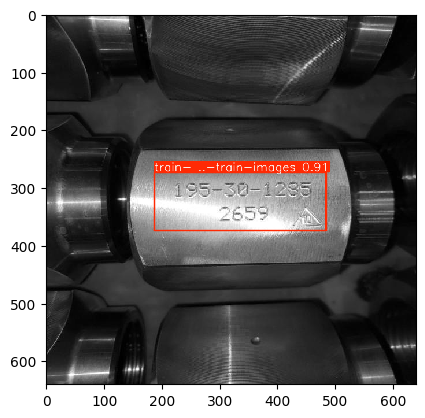

Number of cropped images: 1
OCR time for cropped_bbox_0.jpg: 0.09 seconds
Самая похожая строка: 1753-30-1325
1s5-3u-1255

0: 640x640 1 train- ..-train-images, 35.0ms
Speed: 6.0ms preprocess, 35.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Detection time for 321_JPG.rf.ec6eaaa78bbd026758020ee7c5a6c145.jpg: 0.05 seconds


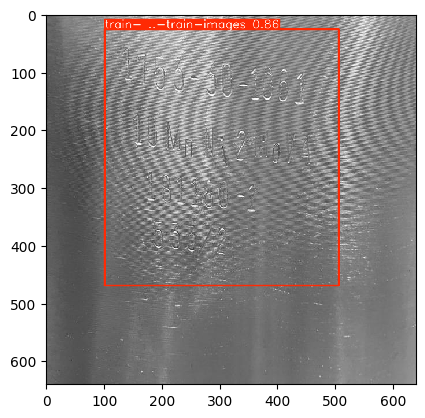

Number of cropped images: 1
OCR time for cropped_bbox_0.jpg: 0.16 seconds
Самая похожая строка: АМ117.07.01.221 Пр. макс
нет текста

0: 640x640 1 train- ..-train-images, 34.0ms
Speed: 3.0ms preprocess, 34.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Detection time for 328_jpg.rf.b235a5699e08745d94dcbc73a6383807.jpg: 0.04 seconds


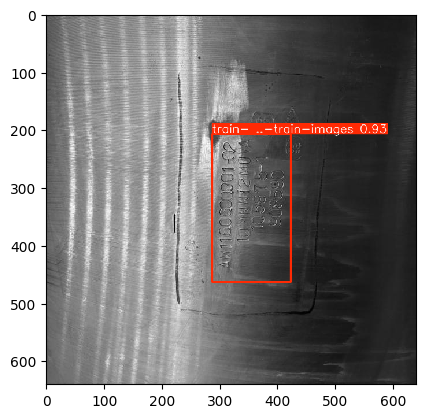

Number of cropped images: 1
OCR time for cropped_bbox_0.jpg: 0.06 seconds
Самая похожая строка: 7109-4361
9

0: 640x640 1 train- ..-train-images, 33.0ms
Speed: 3.0ms preprocess, 33.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Detection time for 370_JPG.rf.049e6bc40d2f98b83f45d8658d2331c4.jpg: 0.04 seconds


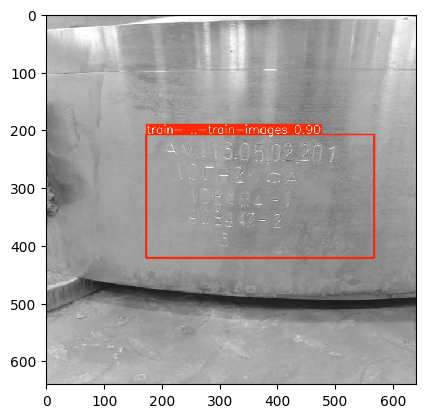

Number of cropped images: 1
OCR time for cropped_bbox_0.jpg: 0.15 seconds
Самая похожая строка: 7109-4308А
А

0: 640x640 1 train- ..-train-images, 31.0ms
Speed: 4.0ms preprocess, 31.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Detection time for 415_JPG.rf.f1f68abfa446105c9c2c47966cde28f2.jpg: 0.04 seconds


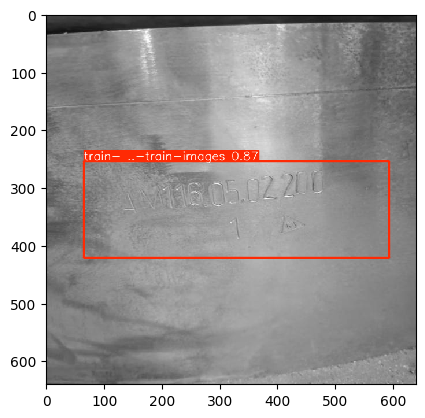

Number of cropped images: 1
OCR time for cropped_bbox_0.jpg: 0.10 seconds
Самая похожая строка: 1250323
ZDL

0: 640x640 1 train- ..-train-images, 9.0ms
Speed: 3.0ms preprocess, 9.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Detection time for 42_JPG.rf.83b5bfd99663bbc6c613a80db8a7b979.jpg: 0.02 seconds


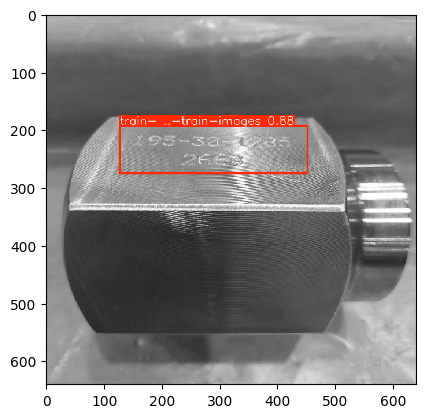

Number of cropped images: 1
OCR time for cropped_bbox_0.jpg: 0.07 seconds
Самая похожая строка: 1250323
тэsxа

0: 640x640 1 train- ..-train-images, 10.0ms
Speed: 2.0ms preprocess, 10.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Detection time for 55_JPG.rf.5788c84efc38197c9ffc70722651fc34.jpg: 0.02 seconds


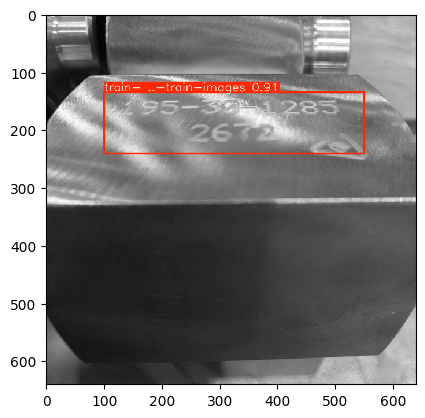

Number of cropped images: 1
OCR time for cropped_bbox_0.jpg: 0.05 seconds
Самая похожая строка: 1250323
2>а

0: 640x640 1 train- ..-train-images, 10.0ms
Speed: 2.0ms preprocess, 10.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Detection time for 59_JPG.rf.aa58d60d9c4be696fde12e9241b41ab9.jpg: 0.02 seconds


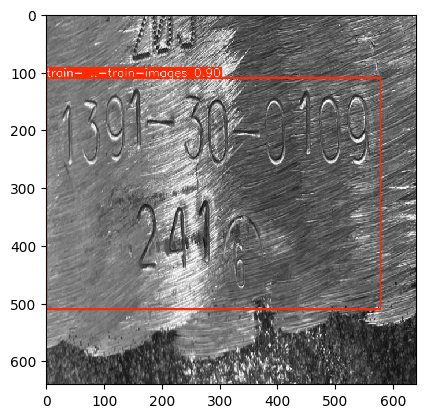

Number of cropped images: 1
OCR time for cropped_bbox_0.jpg: 0.09 seconds
Самая похожая строка: 7109-4361
K'-3 ,

0: 640x640 1 train- ..-train-images, 10.0ms
Speed: 3.0ms preprocess, 10.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Detection time for 60_JPG.rf.89289b340a4aad962cf1ac2c91f438d8.jpg: 0.02 seconds


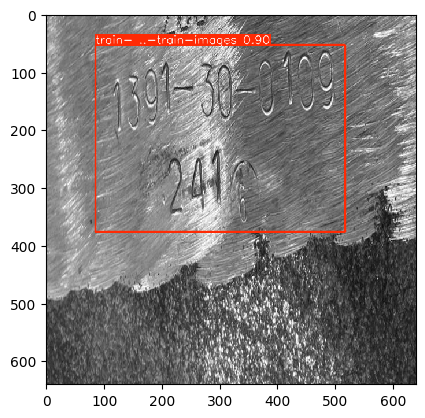

Number of cropped images: 1
OCR time for cropped_bbox_0.jpg: 0.06 seconds
Самая похожая строка: 1753-30-1061
IF516s

0: 640x640 1 train- ..-train-images, 10.0ms
Speed: 3.0ms preprocess, 10.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Detection time for 61_JPG.rf.b24f78cde1938310dd15c8df4d08a9be.jpg: 0.02 seconds


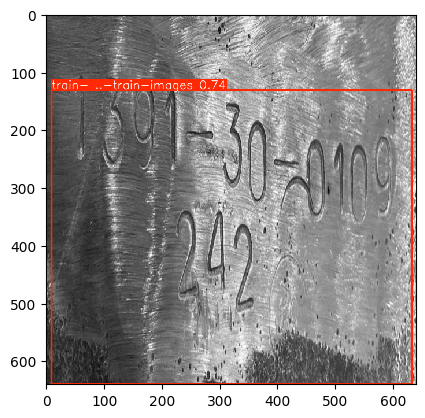

Number of cropped images: 1
OCR time for cropped_bbox_0.jpg: 0.10 seconds
Самая похожая строка: 7109-4361
41

0: 640x640 1 train- ..-train-images, 10.0ms
Speed: 2.0ms preprocess, 10.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Detection time for 72_JPG.rf.951a0d89c43b70b9ef71878a43659c05.jpg: 0.02 seconds


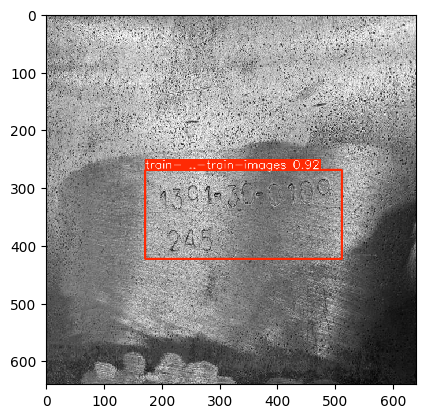

Number of cropped images: 1
OCR time for cropped_bbox_0.jpg: 0.05 seconds
Самая похожая строка: 1391-30-0108 ТС1.1
13С1-3(-C 1ОC

0: 640x640 1 train- ..-train-images, 10.0ms
Speed: 3.0ms preprocess, 10.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Detection time for 96_JPG.rf.a577029b251cb2e3f4e03409cd00a692.jpg: 0.02 seconds


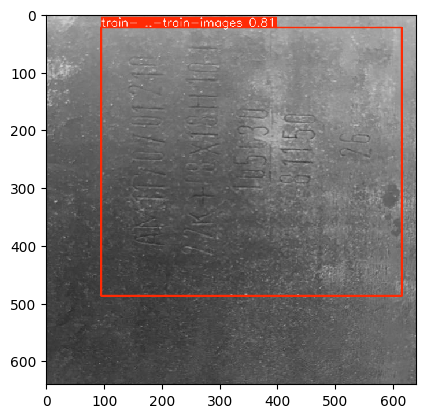

Number of cropped images: 1
OCR time for cropped_bbox_0.jpg: 0.07 seconds
Самая похожая строка: АМ117.07.01.221 Пр. макс
нет текста
CSV file saved at: predictions_submission.csv


In [6]:
import os
import time
import pandas as pd
from ultralytics import YOLO
import easyocr
from PIL import Image
import matplotlib.pyplot as plt

# Initialize YOLO and OCR models
model = YOLO('09-november.pt')
reader = easyocr.Reader(['ru', 'en'])

images_path = "C:\\Users\\golov\\Downloads\\images\\"
list_of_path_images = [os.path.join(images_path, image_path) for image_path in os.listdir(images_path)]

# Create DataFrame to match the structure of "grounded true train.csv"
predictions_df = pd.DataFrame(columns=['image_file', 'label', 'label_text'])

def crop_by_bboxes(image, bboxes):
    """Crop the image according to the bounding boxes."""
    cropped_images = []
    for bbox in bboxes:
        x_center, y_center, width, height = bbox
        left = x_center - width / 2
        upper = y_center - height / 2
        right = x_center + width / 2
        lower = y_center + height / 2
        cropped_img = image.crop((left, upper, right, lower))
        cropped_images.append(cropped_img)
    return cropped_images

for image_path in list_of_path_images:
    try:
        # Load image
        image = Image.open(image_path).convert('RGB')
        
        # Object detection timing
        start_detection = time.time()
        results = model(image, iou=0.4)
        end_detection = time.time()
        detection_time = end_detection - start_detection
        print(f"Detection time for {os.path.basename(image_path)}: {detection_time:.2f} seconds")
        
        i = results[0]
        bboxes = i.boxes.xywh.tolist()  # List of bounding boxes
        
        # Display detected objects on image
        array = i.plot()
        plt.imshow(array, interpolation='nearest')
        plt.show()
        
        # Crop and process each bounding box
        cropped_images = crop_by_bboxes(image, bboxes)
        print(f"Number of cropped images: {len(cropped_images)}")
        
        # Create a single label string for all bounding boxes in the image
        label_list = []
        tocsv=''
        for box_id, cropped_img in enumerate(cropped_images):
            cropped_image_path = f"cropped_bbox_{box_id}.jpg"
            cropped_img.save(cropped_image_path)
            
            # OCR timing
            start_ocr = time.time()
            result = reader.readtext(cropped_image_path)
            end_ocr = time.time()
            ocr_time = end_ocr - start_ocr
            print(f"OCR time for cropped_bbox_{box_id}.jpg: {ocr_time:.2f} seconds")
            
            # Get the predicted text from OCR results
            predicted_text = result[0][1] if result else "нет текста"
            if  box_id==0:
                most_similar = find_most_similar_string('"' + predicted_text+ '"' , data_check)
                most_similar=most_similar[1:-1]
            else:
                most_similar=predicted_text
            print("Самая похожая строка:", most_similar)
            print (predicted_text)
            # Prepare the bounding box coordinates in the required format
            if box_id==0:
                x_center, y_center, width, height = bboxes[box_id]
                label_entry = f"0 {x_center} {y_center} {width} {height}"
                label_list.append(label_entry)
            tocsv+="".join(most_similar)
            # Append the prediction to the DataFrame in the required format
            if box_id==len(cropped_images)-1:
                predictions_df = pd.concat([
                    predictions_df,
                    pd.DataFrame({
                        'image_file': [os.path.basename(image_path)],
                        'label': [f'{"".join(label_list)}'+'\n'],
                        'label_text': ['"'+f'{tocsv}'+'"']
                    })
                ]
                , ignore_index=True)
            
            os.remove(cropped_image_path)
    except Exception as e:
        print(f"Error processing {os.path.basename(image_path)}: {e}")
        continue

# Save the DataFrame to CSV file in the required format
output_path = "predictions_submission.csv"
predictions_df.to_csv(output_path, index=False)
print(f"CSV file saved at: {output_path}")
